In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('display.max_columns', None) 

In [3]:
bbca = pd.read_csv('BBCA.JK.csv')
ihsg = pd.read_csv('^JKSE.csv')

In [4]:
stock = [bbca, ihsg]

In [5]:
bbca.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
2709,12/24/2018,25850.0000,25850.0000,25850.0000,25850.0000,25615.8359,0.0000,BBCA
2710,12/25/2018,25850.0000,25850.0000,25850.0000,25850.0000,25615.8359,0.0000,BBCA
2711,12/26/2018,25850.0000,26125.0000,25700.0000,26125.0000,25888.3438,13302300.0000,BBCA
2712,12/27/2018,26200.0000,26275.0000,25900.0000,25975.0000,25739.7031,10053100.0000,BBCA
2713,12/28/2018,25975.0000,26200.0000,25900.0000,26000.0000,25764.4766,10893500.0000,BBCA


In [6]:
ihsg.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2709,12/24/2018,nan,nan,nan,nan,nan,nan
2710,12/25/2018,nan,nan,nan,nan,nan,nan
2711,12/26/2018,6126.6528,6144.6050,6094.4121,6127.8501,6127.8501,53220400.0000
2712,12/27/2018,6173.5181,6191.7031,6157.6528,6190.6431,6190.6431,65545500.0000
2713,12/28/2018,6200.2969,6212.1250,6176.6309,6194.4980,6194.4980,69954900.0000


In [7]:
print('BBCA\n')
print(bbca.head())
print(bbca.info())

BBCA

       Date      Open      High       Low     Close  Adj Close         Volume  \
0  1/2/2008 3650.0000 3650.0000 3600.0000 3625.0000  3081.5435  11800000.0000   
1  1/3/2008 3575.0000 3600.0000 3500.0000 3550.0000  3017.7869  41328000.0000   
2  1/4/2008 3575.0000 3600.0000 3525.0000 3600.0000  3060.2913 112748000.0000   
3  1/7/2008 3550.0000 3550.0000 3500.0000 3550.0000  3017.7869  43878000.0000   
4  1/8/2008 3550.0000 3575.0000 3525.0000 3525.0000  2996.5352  40802000.0000   

   Name  
0  BBCA  
1  BBCA  
2  BBCA  
3  BBCA  
4  BBCA  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 8 columns):
Date         2714 non-null object
Open         2699 non-null float64
High         2699 non-null float64
Low          2699 non-null float64
Close        2699 non-null float64
Adj Close    2699 non-null float64
Volume       2699 non-null float64
Name         2714 non-null object
dtypes: float64(6), object(2)
memory usage: 169.7+ KB
None


In [8]:
bbca.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2699.0000,10928.0937,6086.6336,2100.0000,6125.0000,10150.0000,14100.0000,26200.0000
High,2699.0000,11040.9967,6127.2202,2225.0000,6275.0000,10250.0000,14275.0000,26975.0000
Low,2699.0000,10813.4865,6050.3726,2000.0000,6050.0000,9975.0000,14000.0000,25900.0000
Close,2699.0000,10931.3542,6089.9254,2025.0000,6150.0000,10100.0000,14112.5000,26300.0000
Adj Close,2699.0000,10359.0782,6126.8415,1764.0880,5512.2542,9417.6191,13397.9893,26061.7598
Volume,2699.0000,14830328.3153,10644435.1913,0.0000,8490150.0000,12626100.0000,18178950.0000,212572300.0000


In [9]:
ihsg.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2663.0000,4204.7851,1338.9071,1119.1160,3404.4485,4408.7451,5201.7295,6687.2310
High,2663.0000,4228.3705,1340.3946,1131.7581,3443.3530,4441.8442,5225.0496,6693.4658
Low,2663.0000,4178.5950,1337.2853,1089.3400,3343.5525,4391.1768,5183.2686,6634.8882
Close,2663.0000,4205.2850,1337.9317,1111.3900,3412.9670,4416.9370,5208.0706,6689.2871
Adj Close,2663.0000,4205.1944,1337.9348,1111.3571,3412.8657,4416.8057,5207.9158,6689.2871
Volume,2663.0000,2463200248.5167,2193227624.2034,0.0000,88201650.0000,2723431000.0000,3949485600.0000,9788202500.0000


# Missing Value

#### Missing Value BCA

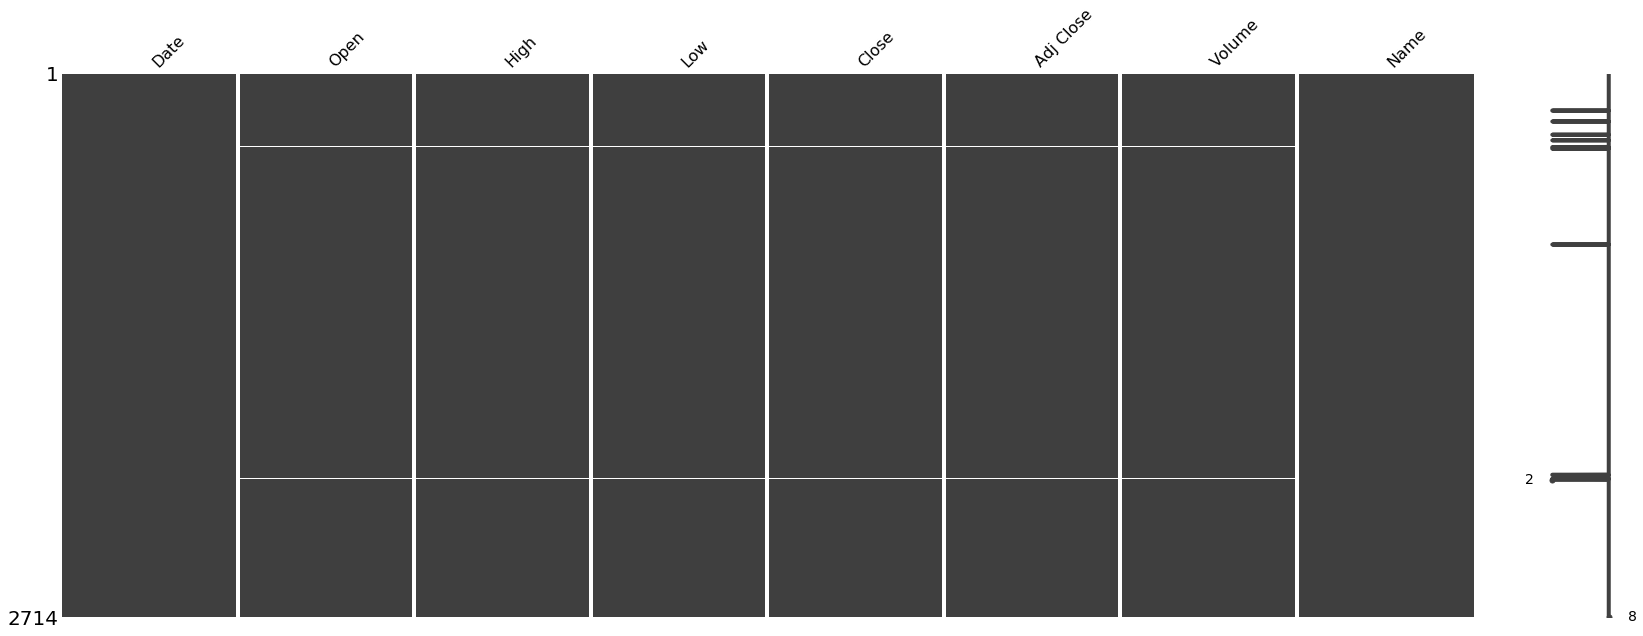

In [10]:
msno.matrix(bbca)

In [11]:
bbca[bbca['Close'].isnull()].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
183,10/9/2008,nan,nan,nan,nan,nan,nan,BBCA
184,10/10/2008,nan,nan,nan,nan,nan,nan,BBCA
238,12/31/2008,nan,nan,nan,nan,nan,nan,BBCA
304,4/9/2009,nan,nan,nan,nan,nan,nan,BBCA
332,5/21/2009,nan,nan,nan,nan,nan,nan,BBCA


#### Missing Value Stock index (IHSG)

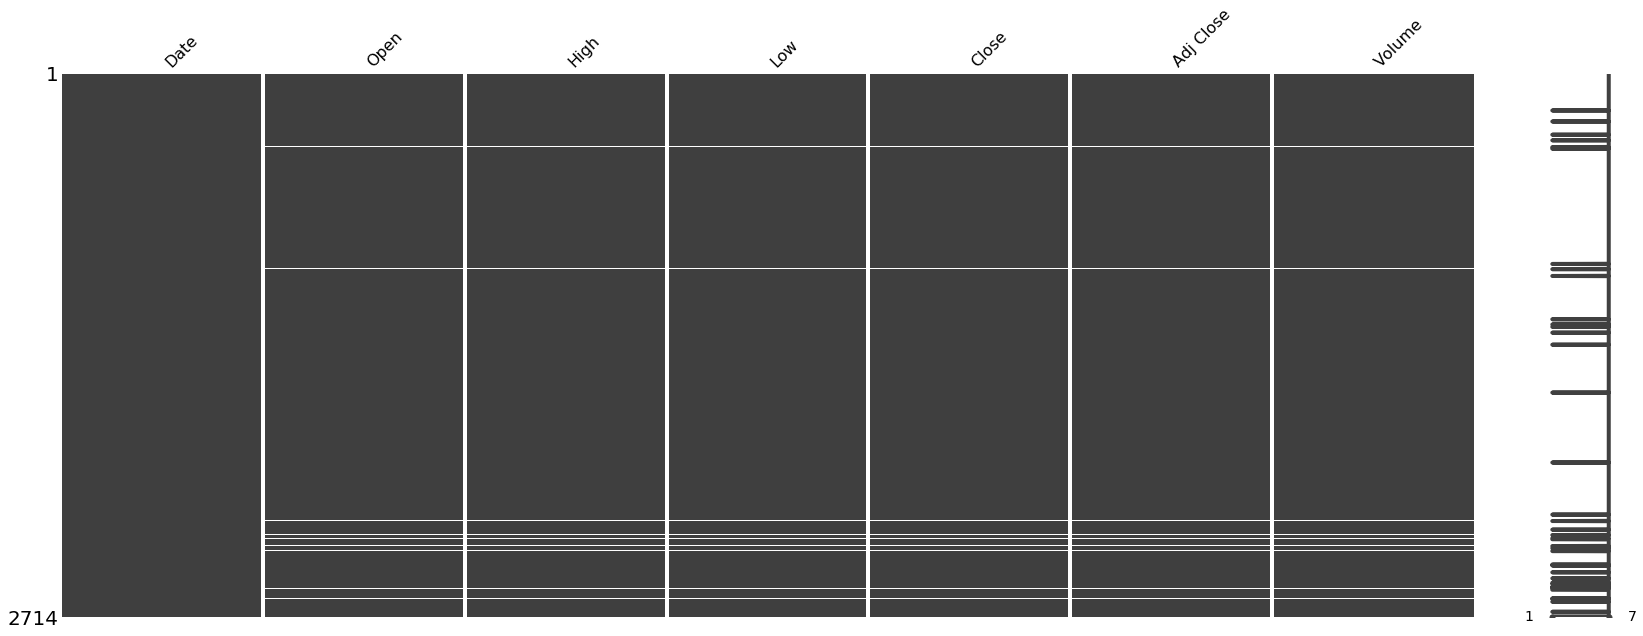

In [12]:
msno.matrix(ihsg)

In [13]:
ihsg[ihsg['Close'].isnull()].head()

,Date,Open,High,Low,Close,Adj Close,Volume
183,10/9/2008,nan,nan,nan,nan,nan,nan
238,12/31/2008,nan,nan,nan,nan,nan,nan
304,4/9/2009,nan,nan,nan,nan,nan,nan
332,5/21/2009,nan,nan,nan,nan,nan,nan
366,7/8/2009,nan,nan,nan,nan,nan,nan


#### Filling The Missing Value

In [14]:
for i in stock:
    i['Volume'].fillna(0, inplace = True)
    i[['Open', 'High', 'Low', 'Close', 'Adj Close']] = i[['Open', 'High', 'Low', 'Close', 'Adj Close']].fillna(method = 'backfill')

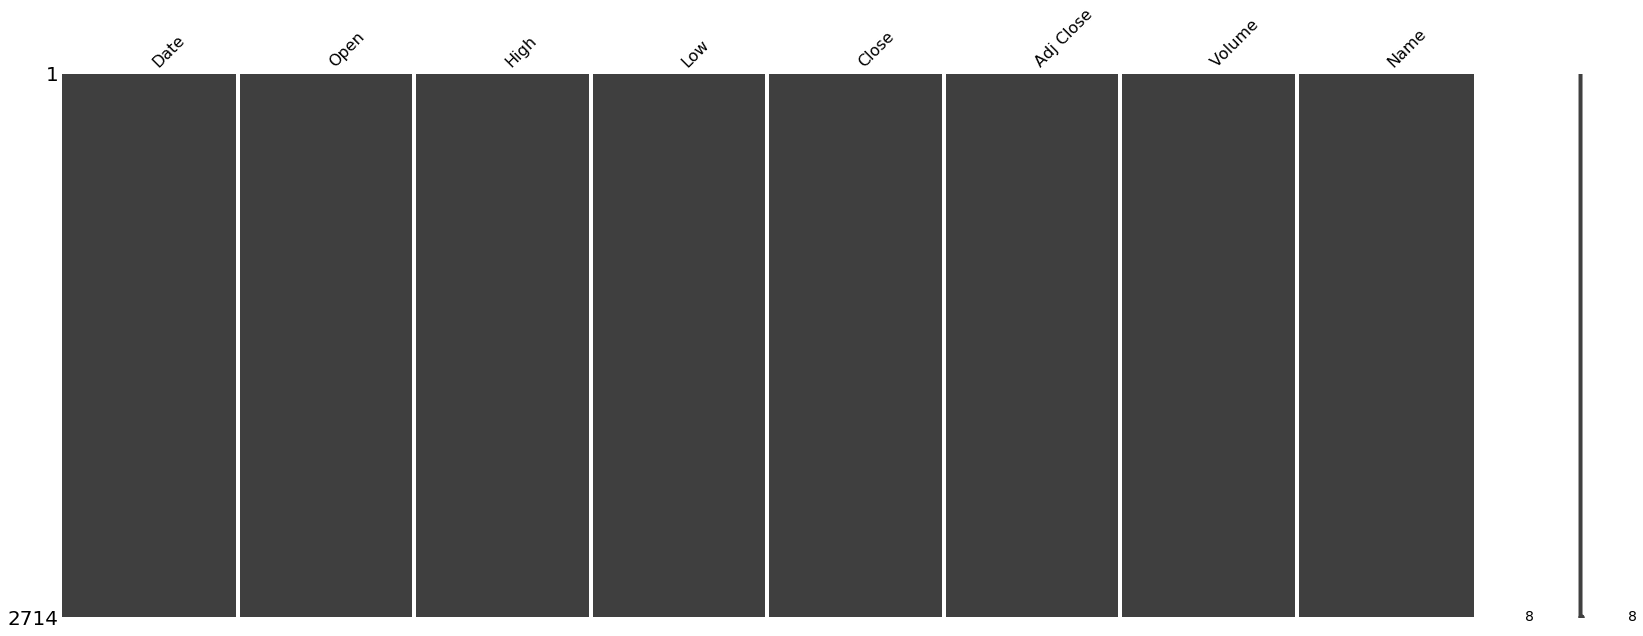

In [15]:
msno.matrix(bbca)

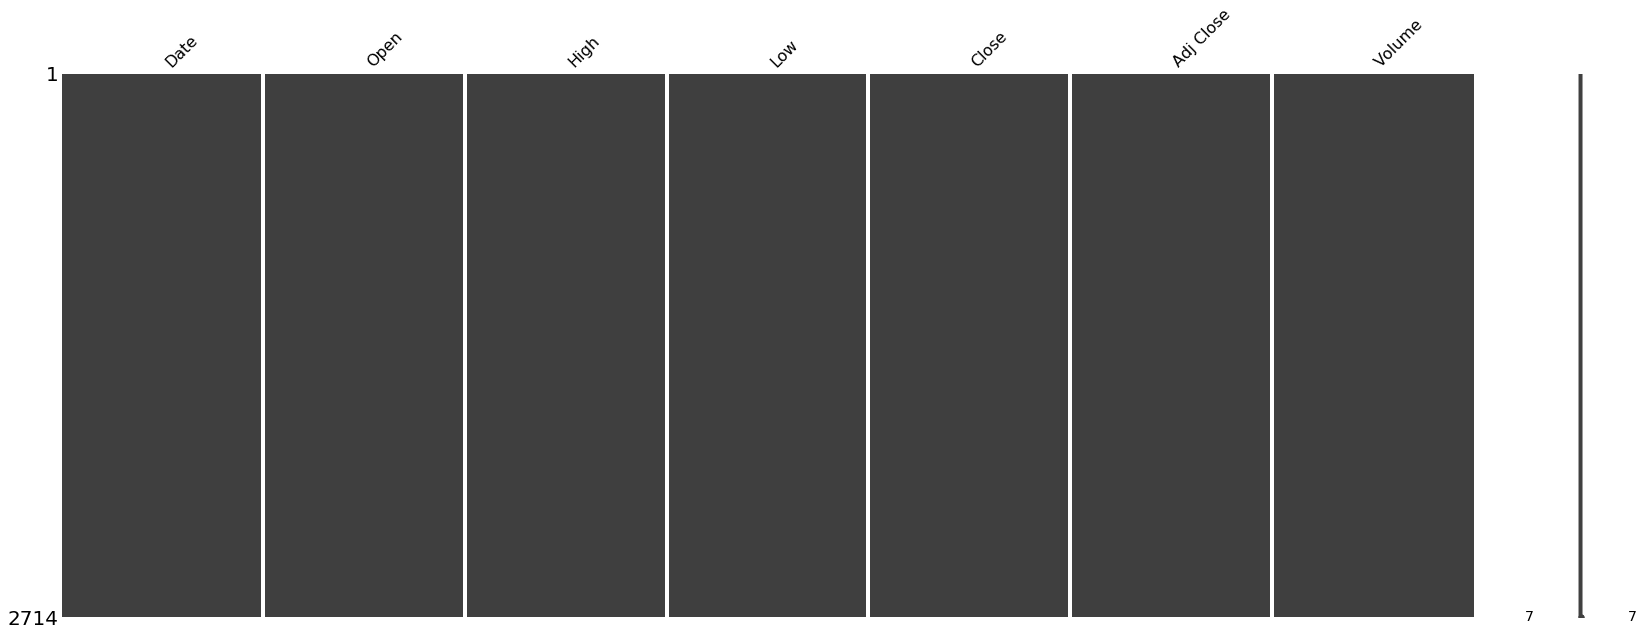

In [16]:
msno.matrix(ihsg)

## Date Exploratory & Extraction

In [17]:
for i in stock:
    i['Date'] = pd.to_datetime(i['Date'], format = '%m/%d/%Y')

##### Check Minimum and Maximum Date

In [18]:
lst = [bbca, ihsg]
for sto in lst:
    print(sto['Date'].min(), sto['Date'].max())

2008-01-02 00:00:00 2018-12-28 00:00:00
2008-01-02 00:00:00 2018-12-28 00:00:00


##### Create features of Year, Month, and Day

In [19]:
for i in stock:
    i['year'] = i['Date'].dt.year
    i['month'] = i['Date'].dt.month
    i['day']= i['Date'].dt.day

##### Create features of  Day of week, 1 = Monday, 5 = Friday

In [20]:
for i in stock:
    i['Day of week'] = i['Date'].dt.dayofweek
    temp = i['Date']
    i['Day of week'] = i['Day of week']+1

In [21]:
bbca.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name,year,month,day,Day of week
2709,2018-12-24,25850.0000,25850.0000,25850.0000,25850.0000,25615.8359,0.0000,BBCA,2018,12,24,1
2710,2018-12-25,25850.0000,25850.0000,25850.0000,25850.0000,25615.8359,0.0000,BBCA,2018,12,25,2
2711,2018-12-26,25850.0000,26125.0000,25700.0000,26125.0000,25888.3438,13302300.0000,BBCA,2018,12,26,3
2712,2018-12-27,26200.0000,26275.0000,25900.0000,25975.0000,25739.7031,10053100.0000,BBCA,2018,12,27,4
2713,2018-12-28,25975.0000,26200.0000,25900.0000,26000.0000,25764.4766,10893500.0000,BBCA,2018,12,28,5


### Size Comparation

In [22]:
saham = [bbca, ihsg]
for i in saham:
    print(i.shape)
    print(i.head(1))
    print(i.tail(1))

(2714, 12)
        Date      Open      High       Low     Close  Adj Close        Volume  \
0 2008-01-02 3650.0000 3650.0000 3600.0000 3625.0000  3081.5435 11800000.0000   

   Name  year  month  day  Day of week  
0  BBCA  2008      1    2            3  
           Date       Open       High        Low      Close  Adj Close  \
2713 2018-12-28 25975.0000 26200.0000 25900.0000 26000.0000 25764.4766   

            Volume  Name  year  month  day  Day of week  
2713 10893500.0000  BBCA  2018     12   28            5  
(2714, 11)
        Date      Open      High       Low     Close  Adj Close  \
0 2008-01-02 2739.5859 2740.3191 2709.1621 2731.5071  2731.4260   

          Volume  year  month  day  Day of week  
0 115230500.0000  2008      1    2            3  
           Date      Open      High       Low     Close  Adj Close  \
2713 2018-12-28 6200.2969 6212.1250 6176.6309 6194.4980  6194.4980   

            Volume  year  month  day  Day of week  
2713 69954900.0000  2018     12   28    

WE can see that bbca and ihsg having different column size which is name, but we will not use Ihsg name Feature

# Exploratory Analysis

#### Correlation

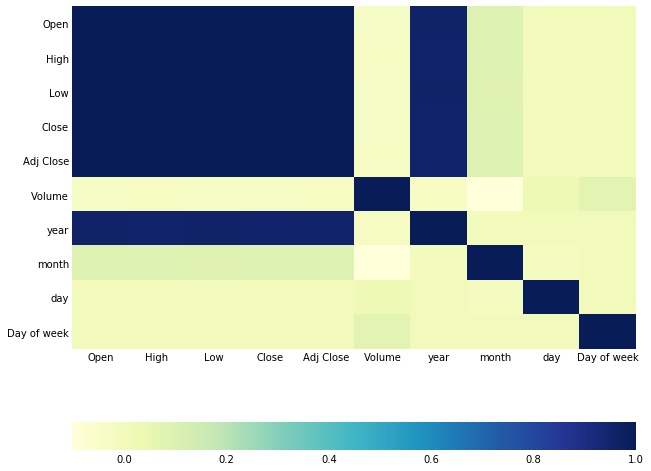

In [23]:
fig = plt.figure(figsize=(9, 9))
sns.heatmap(bbca.corr(), cmap="YlGnBu",cbar_kws={"orientation": "horizontal"})

#### Close Price

In [24]:
bbca.set_index('Date', inplace = True)
ihsg.set_index('Date', inplace = True)

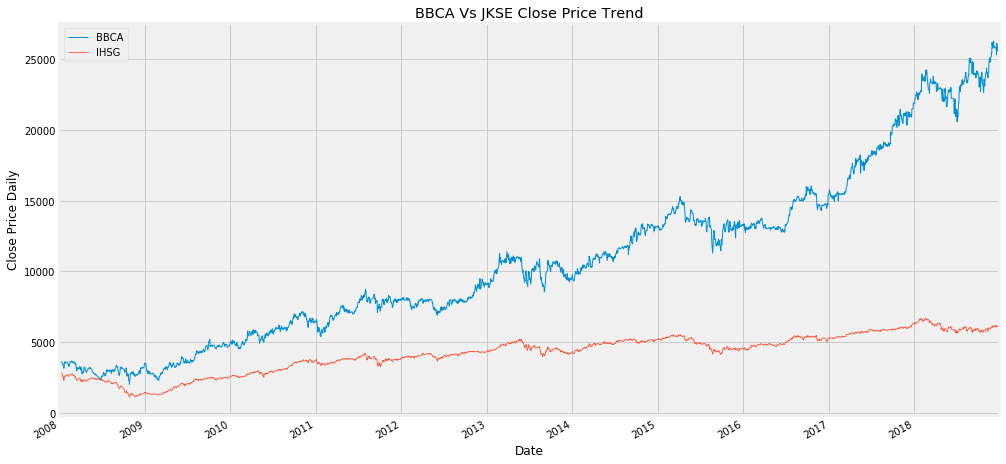

In [25]:
fig = plt.figure(figsize=(15, 8))
bbca['Close'].plot(kind = 'line', label = 'BBCA', linewidth = 1)
ihsg['Close'].plot(kind = 'line', label = 'IHSG', linewidth = 0.8)
plt.title('BBCA Vs JKSE Close Price Trend')
plt.ylabel('Close Price Daily')
plt.legend(loc = 'best')

Both Bank BCA and Indonesia Composite index are in Bullish Trend, but Bullish on BBCA is Much Stronger, we can assume that BBCA are strongly effected by macro-economic condition

#### Volume, period with most traded

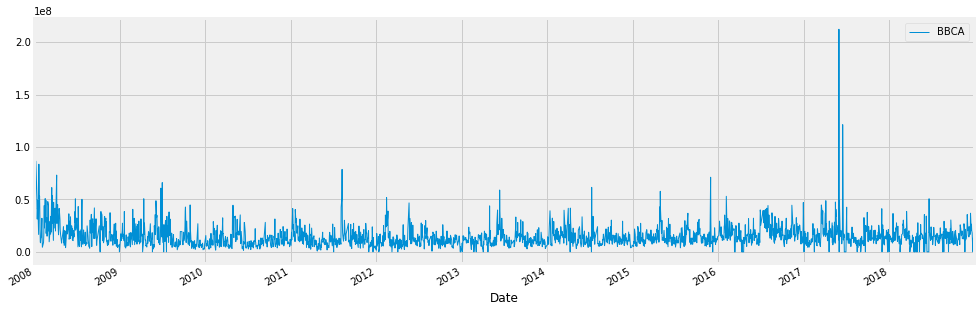

In [26]:
fig = plt.figure(figsize=(15, 5))
bbca['Volume'].plot(kind = 'line', label = 'BBCA', linewidth = 1)
plt.yscale('linear')
plt.legend(loc = 'best')

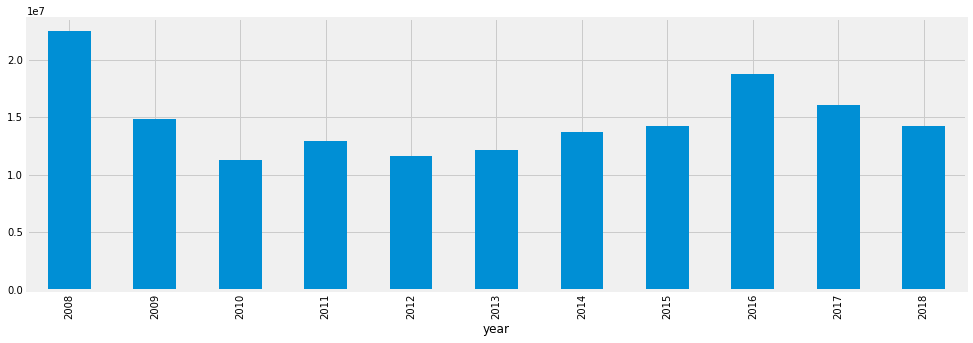

In [27]:
fig = plt.figure(figsize=(15, 5))
bbca.groupby('year')['Volume'].mean().plot.bar()

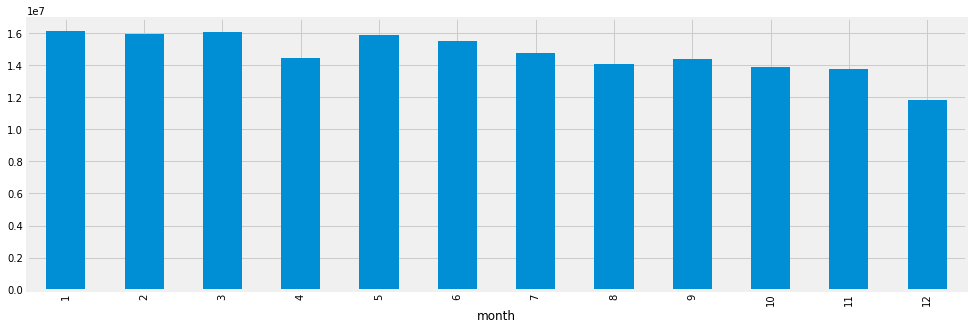

In [28]:
fig = plt.figure(figsize=(15, 5))
bbca.groupby('month')['Volume'].mean().plot.bar()

As we Can see, the Bank BCA average of trade mostly in the first quarter, refers to the historical pattern, Bank BCA mostly share the Divident in the end of first Quarter, so we can assume that Divident id the key factor of stock accumulation.

#### Statsmodel

In [29]:
import statsmodels.api as sm
from pylab import rcParams

In [30]:
y = ihsg['Close'].resample('MS').mean()

In [31]:
y1 = bbca['Close'].resample('MS').mean()

>>BBCA


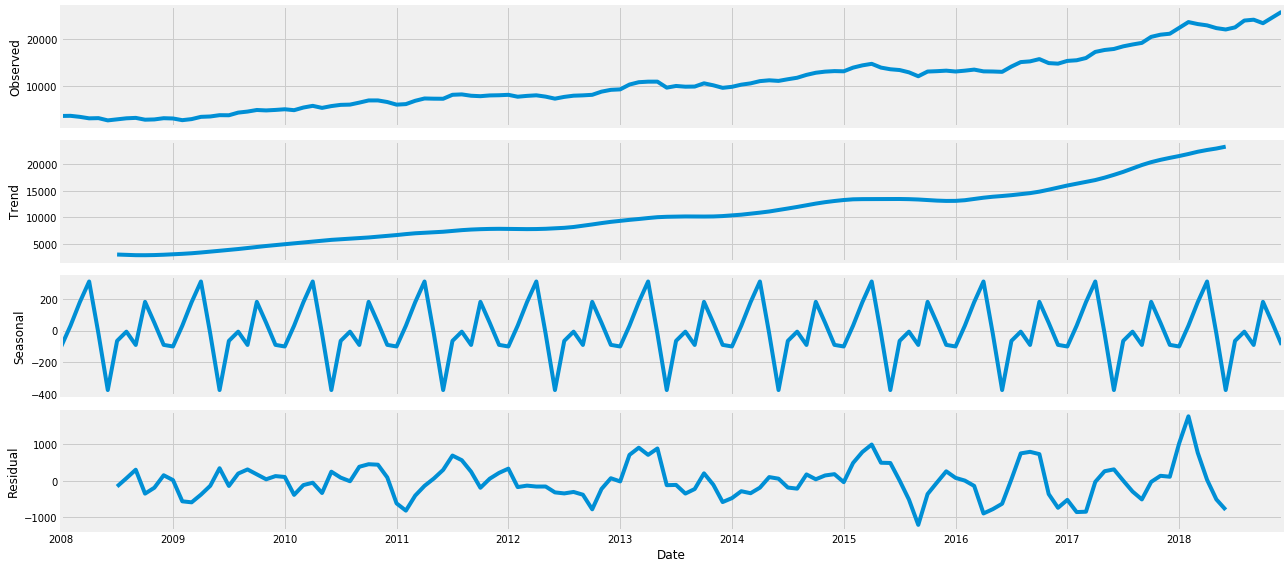

<Figure size 1080x648 with 0 Axes>

In [32]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
print('>>BBCA')
plt.figure(figsize=(15, 9))
plt.show()

# Features Engineering

In [33]:
# ihsg['Index_Close'] = ihsg['Close']
# ihsg = ihsg['Index_Close']
# bbca = bbca.merge(ihsg, how = 'left', on = 'Date')

In [34]:
# bbca.head(3)

In [35]:
# from ta import *
# def get_technical_indicators(dataset):
    
#     # Create 7 and 21 days Moving Average
#     dataset['MA7'] = dataset['Close'].rolling(window=7).mean()
#     dataset['MA21'] = dataset['Close'].rolling(window=21).mean()
#     dataset['MA50'] = dataset['Close'].rolling(window=50).mean()
    
#     # Create Moving Average Convergence Divergence (MACD)
#     dataset['7ExMA'] = dataset['Close'].ewm(span=7).mean()
#     dataset['21ExMA'] = dataset['Close'].ewm(span=21).mean()
#     dataset['MACD'] = (dataset['7ExMA']-dataset['21ExMA'])
    
    
#     # calculate Simple Moving Average with 20 days window
#     sma = dataset['Close'].rolling(window=20).mean()
    

#     # calculate the standar deviation
#     rstd = dataset['Close'].rolling(window=20).std()
    
    
#     # Create Bollinger Bands
#     dataset['Bollinger_Upper']= sma + 2 * rstd
#     dataset['Bollinger_Lower'] = sma - 2 * rstd
    
    
#     # Create Exponential moving average
#     dataset['EMA'] = dataset['Close'].ewm(com=0.5).mean()
    
    
#     # Create Momentum
#     dataset['Momentum'] = dataset['Close']-1
    
    
#     #Relative Strength Index (RSI)
#     diff = dataset['Close'].diff(1)
#     which_dn = diff < 0

#     up, dn = diff, diff*0
#     up[which_dn], dn[which_dn] = 0, -up[which_dn]

#     emaup = ema(up, 12)
#     emadn = ema(dn, 12)

#     dataset['RSI'] = 100 * emaup / (emaup + emadn)
#     dataset['RSI'] = dataset['RSI'].replace([np.inf, -np.inf], np.nan).fillna(50)
    
    
#     #stochastic
#     smin = dataset['Low'].rolling(14, min_periods=0).min()
#     smax = dataset['High'].rolling(14, min_periods=0).max()
#     stoch_k = 100 * (dataset['Close'] - smin) / (smax - smin)
#     stoch_k = stoch_k.replace([np.inf, -np.inf], np.nan).fillna(50)
#     dataset['Stochastic'] = stoch_k
    
#     #stochastic Signal
#     stoch_d = stoch_k.rolling(3, min_periods=0).mean()
#     stoch_d = stoch_d.replace([np.inf, -np.inf], np.nan).fillna(50)
#     dataset['stochastic_Signal'] = stoch_d
    
    
# get_technical_indicators(bbca)

In [36]:
# bbca = bbca.replace([np.inf, -np.inf], np.nan).fillna(50)

In [37]:
# bbca.tail(3)

In [38]:
# fig = plt.figure(figsize=(9, 9))
# sns.heatmap(bbca.corr(), cmap="YlGnBu",cbar_kws={"orientation": "horizontal"})

In [39]:
# bbca_copy = bbca.copy()
# test_split = int(len(bbca_copy) * 0.8)
# bbca_copy.head(3)

# Time Series With ARIMA Model Vs. SARIMAX Model

In [42]:
import itertools

#### ACF Plot

This functions will tell us how correlated are the observations in the time series, the main purpose is that the will indicate us which are the best coefficient to use in our ARIMA model.

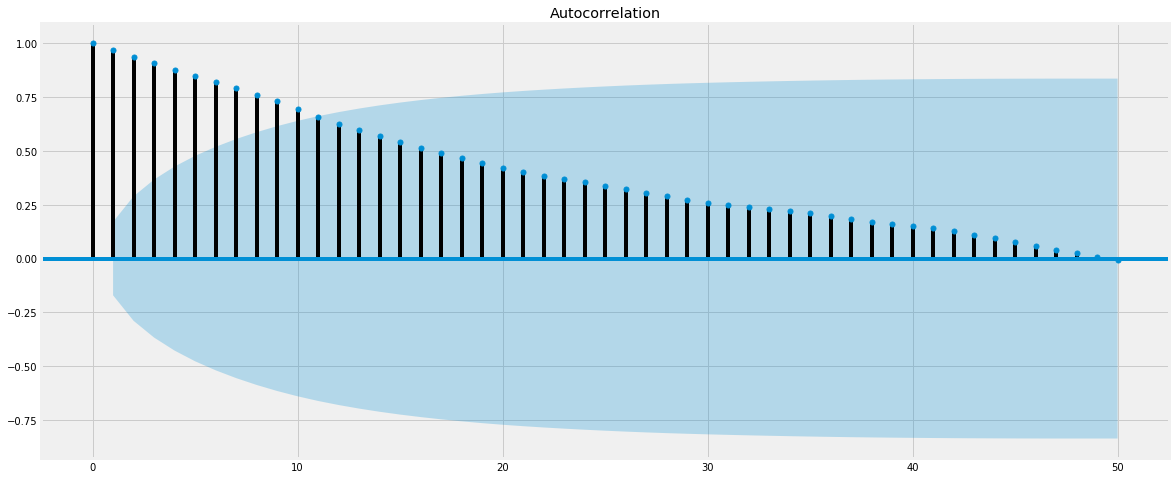

In [43]:
sm.graphics.tsa.plot_acf(y1, lags = 50)
plt.show()

From the ACF plot Above,  we cannot infer the term for the Moving Average (MA) so the best option is to use zero.

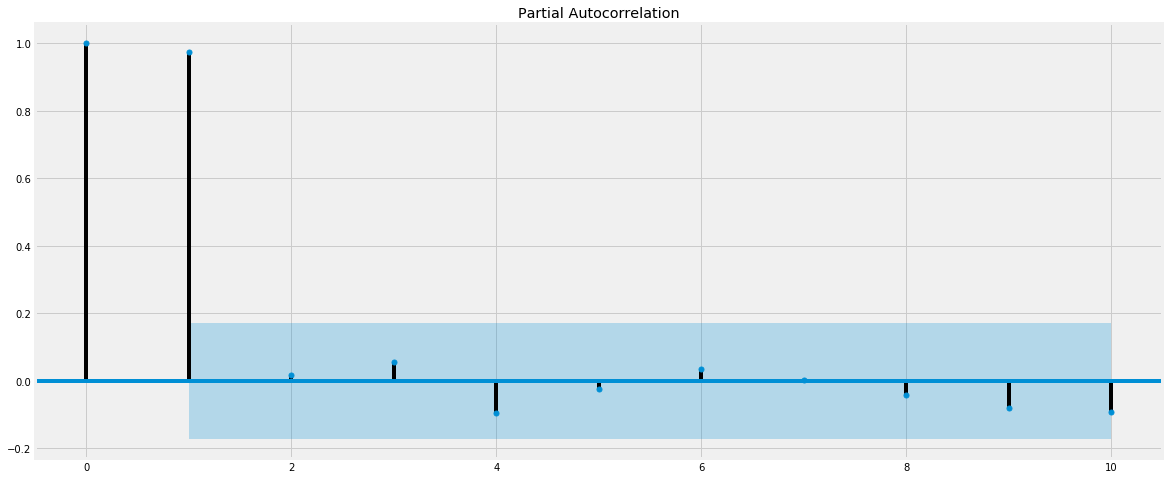

In [44]:
sm.graphics.tsa.plot_pacf(y1, lags = 10)
plt.show()

PCAF Help to determine the Autoregressive Term, the AR value is 0 & 1

### ARIMA

In [45]:
# Model Fit
model = ARIMA(y1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  131
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -989.618
Method:                       css-mle   S.D. of innovations            461.640
Date:                Tue, 25 Jun 2019   AIC                           1993.236
Time:                        12:48:58   BIC                           2013.363
Sample:                    02-01-2008   HQIC                          2001.415
                         - 12-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           170.2213     45.503      3.741      0.000      81.037     259.406
ar.L1.D.Close     0.2500      0.088      2.840      0.005       0.077       0.422
ar.L2.D.Close    -0.2182      0.092     

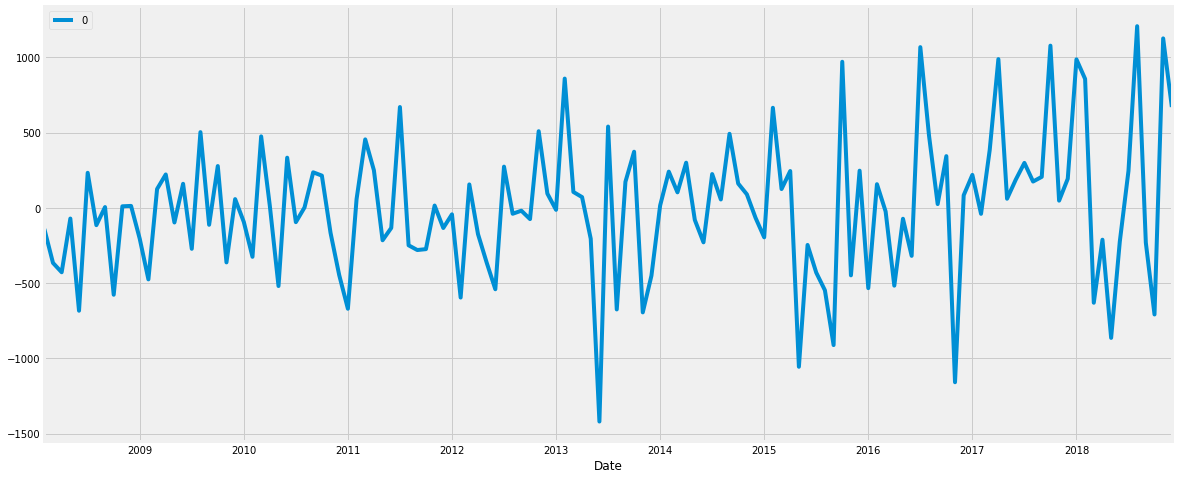

In [46]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

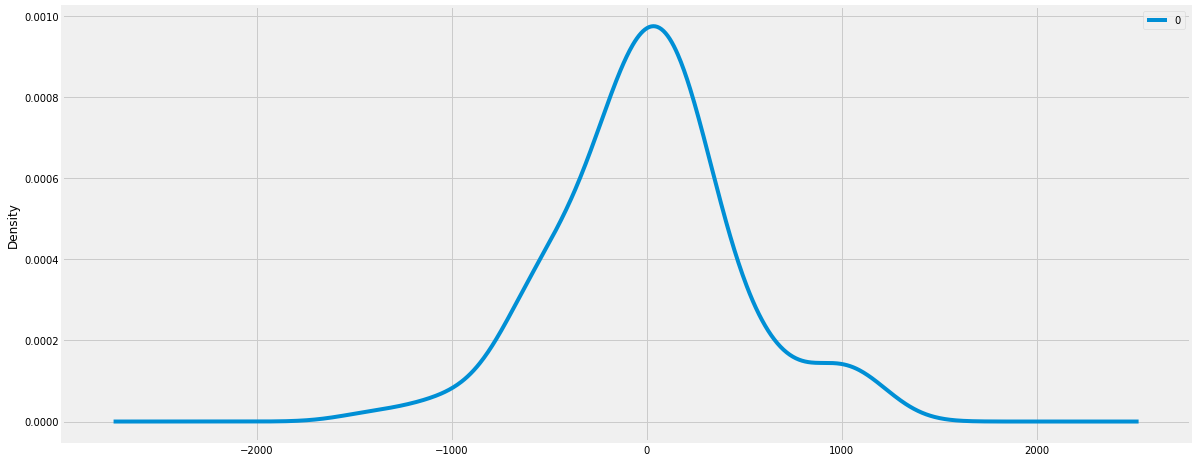

In [47]:
residuals.plot(kind='kde')
plt.show()

In [48]:
print(residuals.describe())

               0
count   131.0000
mean     -0.1178
std     463.5098
min   -1420.3074
25%    -247.5595
50%      10.5707
75%     234.9104
max    1208.0676


### Predicted Close Price Vs. Actual Price

In [49]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

X = y1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
dfeval = []
for t in range(len(test)):
    toeval = []
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, disparity=%f, Diff. Pct=%f' % (yhat, obs, abs(yhat-obs), (abs(yhat-obs)/yhat)*100))

predicted=14442.742841, expected=14720.238095, disparity=277.495255, Diff. Pct=1.921347
predicted=14901.011349, expected=13905.263158, disparity=995.748191, Diff. Pct=6.682420
predicted=13805.774450, expected=13550.000000, disparity=255.774450, Diff. Pct=1.852663
predicted=13826.911026, expected=13380.263158, disparity=446.647868, Diff. Pct=3.230279
predicted=13511.125433, expected=12887.500000, disparity=623.625433, Diff. Pct=4.615644
predicted=12995.633431, expected=12045.238095, disparity=950.395336, Diff. Pct=7.313190
predicted=11921.391339, expected=13058.333333, disparity=1136.941994, Diff. Pct=9.536991
predicted=13448.417565, expected=13138.095238, disparity=310.322327, Diff. Pct=2.307501
predicted=13068.926713, expected=13248.750000, disparity=179.823287, Diff. Pct=1.375961
predicted=13462.105768, expected=13067.500000, disparity=394.605768, Diff. Pct=2.931234
predicted=13112.407804, expected=13247.500000, disparity=135.092196, Diff. Pct=1.030262
predicted=13381.557325, expecte

### MSE

In [50]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 417170.465


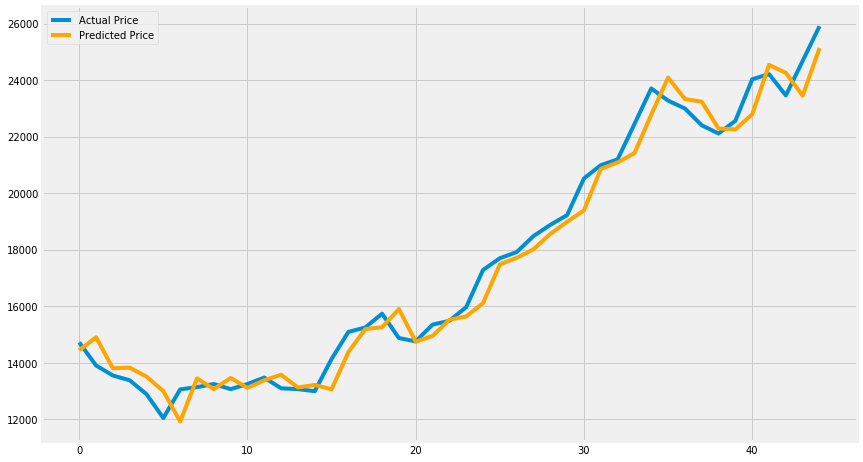

In [51]:
fig = plt.figure(figsize=(13, 8))
plt.plot(test, label = 'Actual Price')
plt.plot(predictions, color='orange', label = 'Predicted Price')
plt.legend(loc = 'best')
plt.show()

# Prophet Model

In [52]:
from fbprophet import Prophet
from subprocess import check_output
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [53]:
Bcaprophet = bbca.reset_index()
Bcaprophet = Bcaprophet[['Date', 'Close']]
Bcaprophet = Bcaprophet.rename(columns={'Date': 'ds', 'Close': 'y'})

In [54]:
fbmodel = Prophet(interval_width=0.95)

In [55]:
fbmodel.fit(Bcaprophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
BcaForecast = fbmodel.make_future_dataframe(periods=36, freq='MS')
BcaForecast = fbmodel.predict(Bcaprophet)

<Figure size 1296x432 with 0 Axes>

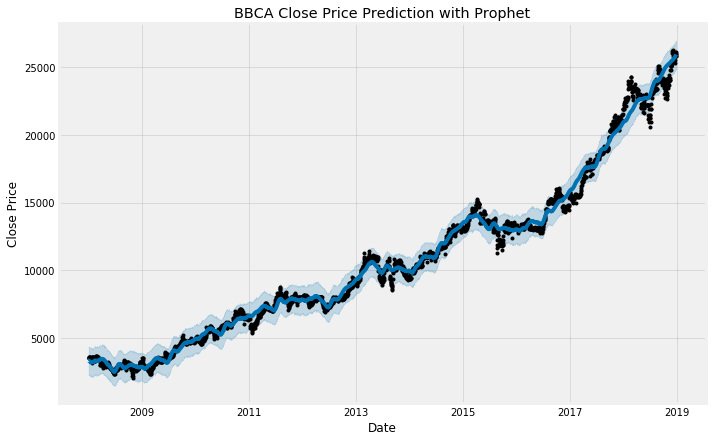

In [57]:
plt.figure(figsize=(18, 6))
fbmodel.plot(BcaForecast, xlabel = 'Date', ylabel = 'Close Price')
plt.title('BBCA Close Price Prediction with Prophet');

In [58]:
Actual = pd.read_csv('BBCATest.csv')
Actual = Actual[['Date', 'Close']]
Actual['Date'] = pd.to_datetime(Actual['Date'], format = '%Y/%m/%d')

In [59]:
Actual.rename(columns={'Date': 'ds', 'Close': 'Actual'}, inplace = True)

In [60]:
future = fbmodel.make_future_dataframe(periods=90)
forecast = fbmodel.predict(future)
backtest = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
backtest.rename(columns={'yhat': 'Predicted', 'yhat_lower': 'Lower Pred', 'yhat_upper': 'Upper Pred'}, inplace = True)

In [61]:
backtest

,ds,Predicted,Lower Pred,Upper Pred
0,2008-01-02,3325.8442,2320.3528,4324.0534
1,2008-01-03,3333.2924,2316.0806,4266.4005
2,2008-01-04,3319.5913,2305.2177,4340.4999
3,2008-01-07,3287.9806,2347.3694,4298.3740
4,2008-01-08,3283.6443,2301.6424,4351.4578
5,2008-01-09,3282.5124,2128.5708,4305.8204
6,2008-01-14,3225.1853,2240.8542,4316.4301
7,2008-01-15,3219.8362,2171.8509,4228.5333
8,2008-01-16,3218.8016,2132.0072,4257.4668
9,2008-01-17,3221.9790,2191.6914,4331.0226


In [63]:
backtest = backtest.merge(Actual, how = 'left', on ='ds')

In [69]:
backtest.dropna(axis = 0, inplace = True)

In [70]:
backtest['Diff'] = abs(backtest['Predicted'] - backtest['Actual'])
backtest['Diff pct'] = (backtest['Diff']/backtest['Actual'])*100

In [75]:
backtest.tail(100)

,ds,Predicted,Lower Pred,Upper Pred,Actual,Diff,Diff pct
2717,2019-01-01,25997.8878,24925.2574,27063.3920,26000.0000,2.1122,0.0081
2718,2019-01-02,26017.7737,25067.1160,27069.4650,26200.0000,182.2263,0.6955
2719,2019-01-03,26040.1888,25024.0544,27051.8290,25900.0000,140.1888,0.5413
2720,2019-01-04,26041.4621,25001.7022,27061.0848,26025.0000,16.4621,0.0633
2723,2019-01-07,26054.8746,24971.8918,27048.8688,26225.0000,170.1254,0.6487
2724,2019-01-08,26065.5966,25044.6514,27193.2488,26200.0000,134.4034,0.5130
2725,2019-01-09,26079.5557,25028.5091,27153.7908,26275.0000,195.4443,0.7438
2726,2019-01-10,26096.6341,25017.6942,27117.2552,26275.0000,178.3659,0.6788
2727,2019-01-11,26093.2917,25152.2543,27192.0431,26250.0000,156.7083,0.5970
2730,2019-01-14,26098.2696,25139.8340,27131.2212,26000.0000,98.2696,0.3780


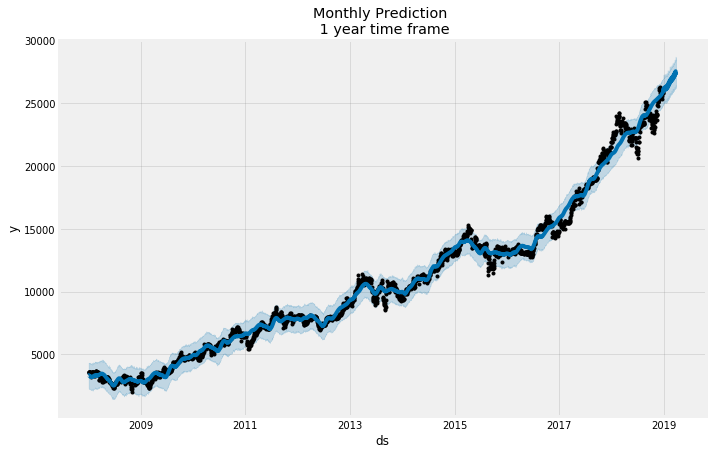

In [76]:
# Monthly Data Predictions
fcst = fbmodel.predict(future)
fig = fbmodel.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

In [78]:
backtest.set_index('ds', inplace = True)

#### Zoom on 2019 Prediction (PRediction from Unseen Train Data)

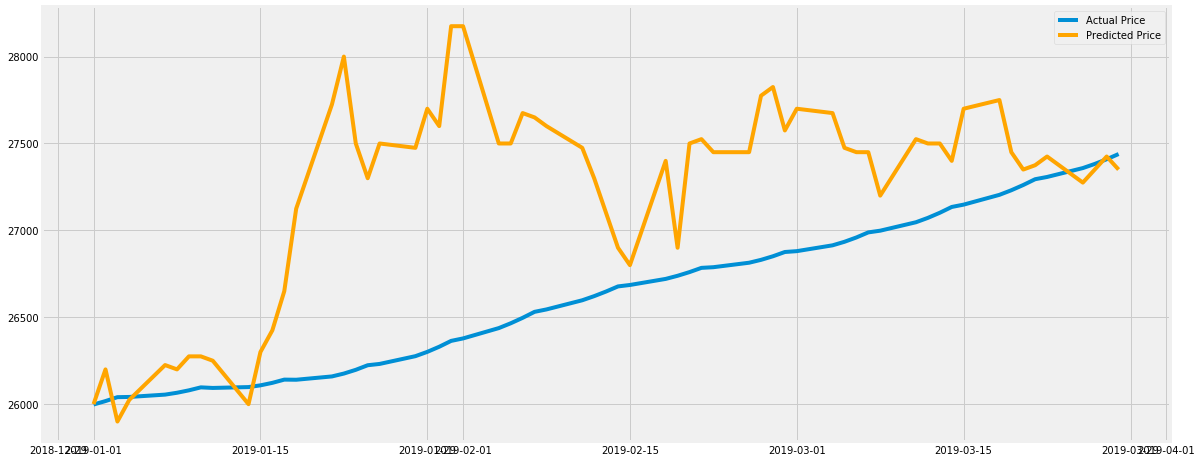

In [80]:
fig = plt.figure(figsize=(18, 8))
plt.plot(backtest['Predicted'], label = 'Actual Price')
plt.plot(backtest['Actual'], color='orange', label = 'Predicted Price')
plt.legend(loc = 'best')
plt.show()

In the early 2019 and the end of first Quarter of 2019 difference between actual and prediction are quiet good (<2%), but in the middle (2nd week of January 2019-3rd week of March 2019), the prediction are far above the actual, approximately (2-6%) which are highly impected the overall portfolio if the difference more than 2%

### Trend and Forecast Visualization

Trends:
BCA's stock price is showing signs of upper trend yearly.

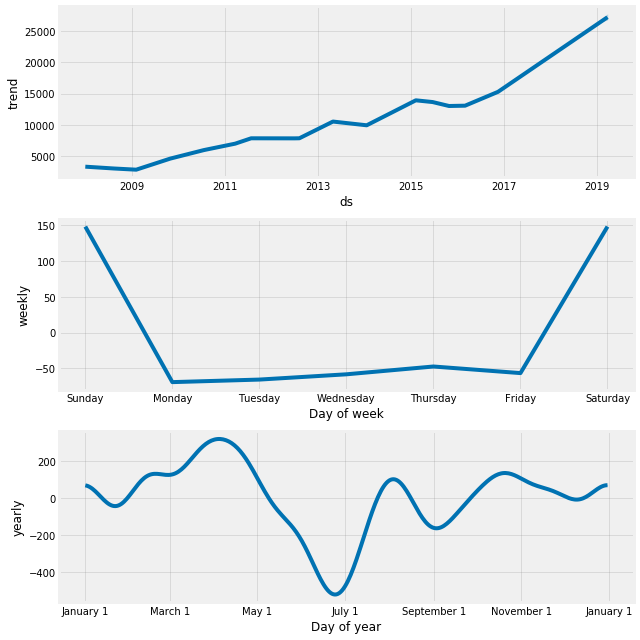

In [77]:
fig = fbmodel.plot_components(fcst)
plt.show()

From the prediction aboce, first quarter of the year BCA will Appreciation boost on Close Price.